In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import seaborn as sns

In [4]:
df=pd.read_csv('기온_시청률.csv', encoding='UTF-8')

In [5]:
df

,Unnamed: 0,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,1.6,1.8,6.4,3.8,4.6,2.7,-0.1,5.2,8.9,3.9
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,2.5,2.5,7.1,4.9,5.3,3.6,1.4,6.0,9.1,4.7
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,7.7,7.1,10.4,9.5,9.0,8.5,7.0,9.6,11.5,8.9
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,11.1,10.4,12.6,12.6,11.5,11.5,10.5,12.3,13.2,11.7
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,18.0,16.7,17.9,19.4,18.8,18.8,18.1,18.1,18.8,18.3
5,6월,10.971125,9.915952,8.548617,7.672667,10.154938,8.552036,23.9,21.8,22.4,24.5,23.6,24.1,24.2,22.7,22.4,23.3
6,7월,9.455696,10.351348,8.392014,9.086927,8.116976,6.947333,24.1,23.2,22.1,23.2,23.4,23.6,23.8,22.1,24.2,23.3
7,8월,7.159565,10.663850,8.679815,9.010185,9.205152,10.999333,26.5,25.9,27.2,28.6,27.6,27.5,26.1,27.6,29.4,27.4
8,9월,7.311111,9.397238,9.385432,9.867310,7.769400,10.648944,21.4,21.3,21.9,21.2,21.3,21.2,19.7,21.1,22.9,21.3
9,10월,10.183417,11.202773,8.429449,6.468862,7.717380,10.176673,14.3,14.8,17.3,15.4,15.7,14.2,11.9,15.9,18.4,15.3


In [10]:
df.rename(columns={'Unnamed: 0':'월'},inplace=True)


In [23]:
df.head()

,월,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,1.6,1.8,6.4,3.8,4.6,2.7,-0.1,5.2,8.9,3.9
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,2.5,2.5,7.1,4.9,5.3,3.6,1.4,6.0,9.1,4.7
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,7.7,7.1,10.4,9.5,9.0,8.5,7.0,9.6,11.5,8.9
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,11.1,10.4,12.6,12.6,11.5,11.5,10.5,12.3,13.2,11.7
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,18.0,16.7,17.9,19.4,18.8,18.8,18.1,18.1,18.8,18.3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       12 non-null     object 
 1   JTBC    12 non-null     float64
 2   KBS1    12 non-null     float64
 3   KBS2    12 non-null     float64
 4   MBC     12 non-null     float64
 5   SBS     12 non-null     float64
 6   tvN     12 non-null     float64
 7   서울      12 non-null     float64
 8   인천      12 non-null     float64
 9   부산      12 non-null     float64
 10  대구      12 non-null     float64
 11  광주      12 non-null     float64
 12  대전      12 non-null     float64
 13  춘천      12 non-null     float64
 14  울산      12 non-null     float64
 15  제주      12 non-null     float64
 16  전체평균    12 non-null     float64
dtypes: float64(16), object(1)
memory usage: 1.7+ KB


In [41]:
model = smf.ols(formula='JTBC~서울',data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JTBC   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.3565
Date:                Sat, 13 Feb 2021   Prob (F-statistic):              0.564
Time:                        15:49:56   Log-Likelihood:                -21.847
No. Observations:                  12   AIC:                             47.69
Df Residuals:                      10   BIC:                             48.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0790      0.833      9.704      0.000       6.224       9.934
서울             0.0309      0.052      0.597      0.564      -0.085       0.146
==============================================================================
Omnibus:                        2.415   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                0.986
Skew:                           0.163   Prob(JB):                        0.611
Kurtosis:                       1.634   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R- squared =0.034 -> 회귀 모형의 설명력 : 3.4%
## 회귀 모형의 F값 0.3565, 유의 확률(Pr>F)은 0.000으로 통계적으로 유의한 모형을 나타냄.
## intercept(절편)이란 모든 독립 변수가 0일 경우의 예측되는 값을 말한다. intercept의 t값이 9.704, P>|t| 값은 0.000으로 회귀모형의 절편값은 유의한 것으로 나타남,그값은 8.0790
## 서울의 기온 t값은 0.564, P>|t| 값은 0.564 유의하지않는다..... 계수는 0.0309
# 모형의 식은 Y= 8.0790+0.0309*'서울'

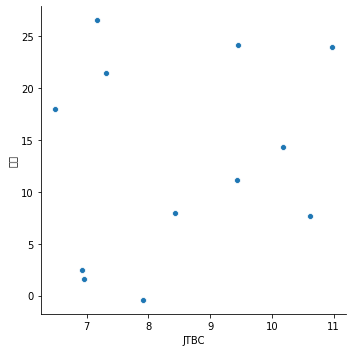

In [48]:
sns.relplot(x="JTBC",y='서울',data=df)

In [6]:
df_1=pd.read_csv('강수량_시청률.csv', encoding='UTF-8')

In [7]:
df_1

,Unnamed: 0,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,60.5,48.6,127.7,70.4,74.9,78.5,80.0,178.7,116.7,92.9
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,53.1,49.7,94.9,40.2,47.8,91.2,54.2,53.6,29.8,57.2
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,16.3,10.7,58.8,24.5,43.5,24.4,13.8,41.6,81.6,35.0
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,16.9,13.8,83.5,32.4,55.3,17.8,14.4,73.2,82.3,43.3
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,112.4,101.2,96.2,38.1,96.8,80.4,118.3,51.5,20.6,79.5
5,6월,10.971125,9.915952,8.548617,7.672667,10.154938,8.552036,139.6,100.2,321.1,185.4,199.9,192.5,75.8,218.6,221.5,183.8
6,7월,9.455696,10.351348,8.392014,9.086927,8.116976,6.947333,270.4,243.5,796.8,330.5,533.3,544.9,174.3,498.3,184.7,397.4
7,8월,7.159565,10.663850,8.679815,9.010185,9.205152,10.999333,675.7,486.4,399.2,322.7,738.1,361.6,773.7,137.1,140.4,448.3
8,9월,7.311111,9.397238,9.385432,9.867310,7.769400,10.648944,181.5,167.7,230.5,161.0,178.3,173.6,157.2,243.0,400.5,210.4
9,10월,10.183417,11.202773,8.429449,6.468862,7.717380,10.176673,0.0,1.9,26.4,13.1,12.1,3.2,0.1,18.9,53.7,14.4


In [13]:
df_1.rename(columns={'Unnamed: 0':'월'},inplace=True)


In [14]:
df_1

,월,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,60.5,48.6,127.7,70.4,74.9,78.5,80.0,178.7,116.7,92.9
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,53.1,49.7,94.9,40.2,47.8,91.2,54.2,53.6,29.8,57.2
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,16.3,10.7,58.8,24.5,43.5,24.4,13.8,41.6,81.6,35.0
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,16.9,13.8,83.5,32.4,55.3,17.8,14.4,73.2,82.3,43.3
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,112.4,101.2,96.2,38.1,96.8,80.4,118.3,51.5,20.6,79.5
5,6월,10.971125,9.915952,8.548617,7.672667,10.154938,8.552036,139.6,100.2,321.1,185.4,199.9,192.5,75.8,218.6,221.5,183.8
6,7월,9.455696,10.351348,8.392014,9.086927,8.116976,6.947333,270.4,243.5,796.8,330.5,533.3,544.9,174.3,498.3,184.7,397.4
7,8월,7.159565,10.663850,8.679815,9.010185,9.205152,10.999333,675.7,486.4,399.2,322.7,738.1,361.6,773.7,137.1,140.4,448.3
8,9월,7.311111,9.397238,9.385432,9.867310,7.769400,10.648944,181.5,167.7,230.5,161.0,178.3,173.6,157.2,243.0,400.5,210.4
9,10월,10.183417,11.202773,8.429449,6.468862,7.717380,10.176673,0.0,1.9,26.4,13.1,12.1,3.2,0.1,18.9,53.7,14.4


In [44]:
model = smf.ols(formula='JTBC~서울',data=df_1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JTBC   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.7408
Date:                Sat, 13 Feb 2021   Prob (F-statistic):              0.410
Time:                        16:22:47   Log-Likelihood:                -21.628
No. Observations:                  12   AIC:                             47.26
Df Residuals:                      10   BIC:                             48.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7934      0.584     15.058      0.000       7.492      10.095
서울            -0.0022      0.003     -0.861      0.410      -0.008       0.004
==============================================================================
Omnibus:                        1.887   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                0.890
Skew:                           0.157   Prob(JB):                        0.641
Kurtosis:                       1.703   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
df_2=pd.read_csv('습도_시청률.csv', encoding='UTF-8')

In [9]:
df_2

,Unnamed: 0,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,55.5,62.8,56.4,61.3,67.7,68.8,70.3,61.1,65.5,63.3
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,58.0,64.6,55.1,58.6,66.7,68.0,66.5,59.1,66.1,62.5
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,46.3,56.4,56.9,60.6,57.9,56.2,54.8,58.5,63.0,56.7
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,50.0,56.6,52.6,53.4,52.2,51.2,50.9,54.6,55.8,53.0
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,67.3,71.3,72.5,64.0,73.4,70.7,68.3,71.6,74.2,70.4
5,6월,10.971125,9.915952,8.548617,7.672667,10.154938,8.552036,67.4,77.0,73.4,63.2,79.4,75.9,66.8,75.0,83.3,73.5
6,7월,9.455696,10.351348,8.392014,9.086927,8.116976,6.947333,76.3,79.7,87.3,78.8,91.1,87.6,76.1,90.8,84.8,83.6
7,8월,7.159565,10.663850,8.679815,9.010185,9.205152,10.999333,85.1,83.9,82.4,71.1,89.0,86.5,84.2,83.3,73.5,82.1
8,9월,7.311111,9.397238,9.385432,9.867310,7.769400,10.648944,70.8,69.4,74.0,73.3,84.5,80.4,78.2,81.0,75.6,76.4
9,10월,10.183417,11.202773,8.429449,6.468862,7.717380,10.176673,60.4,58.2,57.8,63.5,64.1,70.4,73.0,65.6,61.1,63.8


In [15]:
df_2.rename(columns={'Unnamed: 0':'월'},inplace=True)


In [16]:
df_2

,월,JTBC,KBS1,KBS2,MBC,SBS,tvN,서울,인천,부산,대구,광주,대전,춘천,울산,제주,전체평균
0,1월,6.951867,5.544391,11.527724,7.761804,8.174389,7.580526,55.5,62.8,56.4,61.3,67.7,68.8,70.3,61.1,65.5,63.3
1,2월,6.929588,8.925650,10.912870,8.180675,9.636737,8.453750,58.0,64.6,55.1,58.6,66.7,68.0,66.5,59.1,66.1,62.5
2,3월,10.625765,4.300000,11.583089,8.410167,10.314121,6.853367,46.3,56.4,56.9,60.6,57.9,56.2,54.8,58.5,63.0,56.7
3,4월,9.442348,10.171952,10.737622,8.252482,8.694111,9.651276,50.0,56.6,52.6,53.4,52.2,51.2,50.9,54.6,55.8,53.0
4,5월,6.482737,9.607143,8.498521,9.487128,9.498218,8.919364,67.3,71.3,72.5,64.0,73.4,70.7,68.3,71.6,74.2,70.4
5,6월,10.971125,9.915952,8.548617,7.672667,10.154938,8.552036,67.4,77.0,73.4,63.2,79.4,75.9,66.8,75.0,83.3,73.5
6,7월,9.455696,10.351348,8.392014,9.086927,8.116976,6.947333,76.3,79.7,87.3,78.8,91.1,87.6,76.1,90.8,84.8,83.6
7,8월,7.159565,10.663850,8.679815,9.010185,9.205152,10.999333,85.1,83.9,82.4,71.1,89.0,86.5,84.2,83.3,73.5,82.1
8,9월,7.311111,9.397238,9.385432,9.867310,7.769400,10.648944,70.8,69.4,74.0,73.3,84.5,80.4,78.2,81.0,75.6,76.4
9,10월,10.183417,11.202773,8.429449,6.468862,7.717380,10.176673,60.4,58.2,57.8,63.5,64.1,70.4,73.0,65.6,61.1,63.8


In [45]:
model = smf.ols(formula='JTBC~서울',data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JTBC   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.8472
Date:                Sat, 13 Feb 2021   Prob (F-statistic):              0.379
Time:                        16:23:00   Log-Likelihood:                -21.569
No. Observations:                  12   AIC:                             47.14
Df Residuals:                      10   BIC:                             48.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0432      2.814      3.924      0.003       4.773      17.313
서울            -0.0404      0.044     -0.920      0.379      -0.138       0.057
==============================================================================
Omnibus:                        1.371   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                0.835
Skew:                           0.261   Prob(JB):                        0.659
Kurtosis:                       1.819   Cond. No.                         391.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""